In [1]:
# Save Colab's Python version
!python3 --version > colab_python_version.txt

# Save the package list
!pip freeze > requirements_colab.txt

# Download both files
from google.colab import files
files.download("colab_python_version.txt")
files.download("requirements_colab.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
Direct_Detection = False
Direct_DetectionWeights = "/content/drive/model_epoch_199-DETR.pth"

In [3]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

19:58:23


In [4]:
!pip install torch torchvision pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Deletion of any non empty folder

#import shutil
#shutil.rmtree('/content/DETR/detr/runs') # put the path you want to delete

# Set initial path

%cd /content

/content


In [6]:
running_on_vm = True
#false --> running on colab
#true  --> running on vm

In [7]:
delete_previous_data_set = True
# in case of running on vm
  #false --> keep previous dataset that was downloaded from robowflow
  #true  --> delete previous dataset

In [8]:
code_exists_on_vm = False
# in case of running on vm
  #false --> download the code or modify it from github
  #true  --> dont download code from github or modify it

In [9]:
if running_on_vm:
  mainfolderpath = '/content/DETR'
else:
  mainfolderpath = '/content'
%cd $mainfolderpath

/content/DETR


In [10]:
if running_on_vm and (not(code_exists_on_vm)) :
    try:
        shutil.rmtree('detr')
    except:
        No_Error = 0

In [11]:
# #MOUNT GOOGLE DRIVE
# if not running_on_vm:
#     from google.colab import drive
#     drive.mount('/content/drive', force_remount=True)

In [12]:
import warnings;
warnings.filterwarnings('ignore');

#Importing

In [13]:
from google.colab import files
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab.patches import cv2_imshow
import numpy as np
import seaborn as sns

from __future__ import print_function, division


import matplotlib.pyplot as plt
import time
import os
import copy
from PIL import Image


import csv
import requests
import xml.etree.ElementTree as ET
import cv2
import shutil
from IPython.display import clear_output

In [14]:
if not running_on_vm or (running_on_vm and not code_exists_on_vm):
    try:
        shutil.rmtree(mainfolderpath + '/detr')
    except:
        No_Error = 0
    # !git clone https://github.com/facebookresearch/detr.git
    !git clone https://github.com/Ahbassetsh/detr.git
    os.makedirs(mainfolderpath + '/detr/runs', exist_ok=True)

%cd detr


Cloning into 'detr'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 329 (delta 47), reused 13 (delta 13), pack-reused 262 (from 2)
Receiving objects: 100% (329/329), 355.44 KiB | 1.91 MiB/s, done.
Resolving deltas: 100% (168/168), done.
/content/DETR/detr


In [15]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-o3lnezrc/pycocotools_06ec5e2dfa7b40f5909d57c39fa86bc6
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-install-o3lnezrc/pycocotools_06ec5e2dfa7b40f5909d57c39fa86bc6
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [16]:
import torch
import os
import datetime
from torch.utils.data import DataLoader
from datasets import build_dataset, get_coco_api_from_dataset
from engine import train_one_epoch, evaluate
from models import build_model
from util import misc as utils


# Dataset Configuration and Initial Weights


In [17]:
#init_yolo = "yolov5s.pt"   # dummy weights for non pretrained
#init_yolo = "/content/drive/MyDrive/YoloWeights/yolov5s6.pt"   # --> from drive for Pretrained weights with "imagenet", network s6
#init_yolo = "/content/drive/MyDrive/YoloWeights/yolov5m6.pt"   # --> from drive for Pretrained weights with "imagenet" , network m6
#init_yolo = "/content/drive/MyDrive/YoloWeights/yolov5s.pt" # coco , network s
#init_yolo = "/content/drive/MyDrive/YoloWeights/yolov5n.pt" # coco , network n
#init_yolo = "/content/drive/MyDrive/YoloWeights/yolov5m.pt" # coco , network m

#init_yolo = "Custom path"  # --> write custom path here

In [18]:
#class_names = ['Gun']
#class_names = ['Weapon']
class_names = ['Gun' , 'LongGun']
#class_names = ['Gun' , 'LongGun' , 'PartialGun']
#class_names = ['Gun' , 'LongGun' , 'NotGun', 'PartialGun']

#class_names = ['Face']
#class_names = ['with_mask' , 'without_mask' , 'mask_weared_incorrect']  not used with small initials due to order in cofusion matrix is alphabetical (dummy is small initial to be always the last)
#class_names = ['Mask_weared_incorrect' , 'With_mask' , 'Without_mask' , ] # classes is  labeled by its number , not name, so no problem for change initials to capital

num_of_classes = len(class_names)
print(num_of_classes)

2


In [19]:
import shutil
import os

%cd $mainfolderpath

if running_on_vm and delete_previous_data_set:
    try:

        #shutil.rmtree('train')
        #shutil.rmtree('test')
        #shutil.rmtree('valid')
        shutil.rmtree('train2017')
        shutil.rmtree('test2017')
        #shutil.rmtree('valid2017')
        shutil.rmtree('val2017')
        shutil.rmtree('annotations')

        os.remove('README.dataset.txt')
        os.remove('README.roboflow.txt')
        #os.remove('data.yaml')

    except:
        No_Error = 0

/content/DETR


In [20]:
if (not running_on_vm) or (running_on_vm and delete_previous_data_set):

  #Dataset 1 class:
  #if num_of_classes ==1:
    #DS1CFace- Original
    #!curl -L "https://app.roboflow.com/ds/Ta3ZuCz3nh?key=tlmDfUD8sr" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS1 mini - 0 Original    [892]
    #!curl -L "https://app.roboflow.com/ds/DZXNaYaMDv?key=TFnRmq6EGK" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 mini - 1 Augm        [2142]
    #!curl -L "https://app.roboflow.com/ds/Yugj7EsqVp?key=BGC5JRoVir" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 mini - 2 Augm Blur   [2142]
    #!curl -L "https://app.roboflow.com/ds/6ZwCWrb5YQ?key=AIPCtcwt1V" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 mini - 3 Augm Noise  [2142]
    #!curl -L "https://app.roboflow.com/ds/okBMatCcLc?key=sh78iKEUae" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS1 full - 0 Original    [2971]
    #!curl -L "https://app.roboflow.com/ds/d27tX4Tsyi?key=LHaM7Pz2VP" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 full - 1 Augm        [7131]
    #!curl -L "https://app.roboflow.com/ds/2tPjmCTXdJ?key=GEEeyT7ATS" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 full - 2 Augm Blur   [7131]
    #!curl -L "https://app.roboflow.com/ds/S3iQDOb38a?key=xaiKB6BIKE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 full - 3 Augm Noise  [7131]
    #!curl -L "https://app.roboflow.com/ds/j9PDHIvJ9g?key=iWZVXEn5Ba" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DSW1 - 0 Original-S320 [2020]-2 images new-2389 instances
    #!curl -L "https://app.roboflow.com/ds/3YFapwuNvF?key=oqjxahiMpE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 0 Original-S448 [2020]-2 images new-2389 instances
    #!curl -L "https://app.roboflow.com/ds/sR5GPeb6QN?key=tEvVK85WRC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 0 Original-S640 [2020]-2 images new-2389 instances
    #!curl -L "https://app.roboflow.com/ds/Uy0p7zqv8c?key=zSXEovmzIQ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DSW1 - 0 Original [2020] images new-2380 instances
    #!curl -L "https://app.roboflow.com/ds/IL3OuUMwc9?key=V5hHQCzhDj" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 0 Original [2020] images - old deleted
    #!curl -L "https://app.roboflow.com/ds/K24gaje1Br?key=rXD8tHioDa" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 0 Original        [2067]
    #!curl -L "https://app.roboflow.com/ds/JUZcrDan8k?key=sUILHztMLA" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 1 Augm            [3512] - old deleted
    #!curl -L "https://app.roboflow.com/ds/c0PqTxDfiG?key=F2GVqBp9dg" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 2 Augm Blur
    #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 3 Augm Noise
    #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  #Dataset 2 Classes:
  if num_of_classes ==2:
    #DS2CW- 0 Original        [2020]-2
    !curl -L "https://app.roboflow.com/ds/bWfAB5c6z7?key=oncrBUExkI" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS2CW- 0 Original        [2020]
    #!curl -L "https://app.roboflow.com/ds/BEsYJthyCg?key=OzELo1fx7W" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DSG2 - 0 Original        [1568]
    #!curl -L "https://app.roboflow.com/ds/b08m11oX6U?key=lv8sgLBRNq" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSG2 - 1 Augm            [3778]
    #!curl -L "https://app.roboflow.com/ds/XA80St7JCu?key=jdQY4NeRDj" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSG2 - 2 Augm Blur
    #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSG2 - 3 Augm Noise
    #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  #Dataset 3 Classes:
  #if num_of_classes ==3:
    #DS3CFace- Original
    #!curl -L "https://app.roboflow.com/ds/zHVGdYkiJj?key=GYaTug9xIw" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3CW- 0 Original        [2020]-2
    #!curl -L "https://app.roboflow.com/ds/0j9Pn4MCZ4?key=ukwMJ9XET4" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3CW- 0 Original        [2020]
    #!curl -L "https://app.roboflow.com/ds/8VgCuytJ62?key=g3Dcrc2cx4" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS3 - 0 Original Balance [1596]
    #!curl -L "https://app.roboflow.com/ds/lIbyLUIz7D?key=8C5aw7suSh" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3 - 0 Augm Balance     [3841]
    #!curl -L "https://app.roboflow.com/ds/3C1Ge2kAS4?key=VGmFElZTdm" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS3 - 0 Original
    #!curl -L "https://app.roboflow.com/ds/uiNpxoDdUs?key=exz831vMZz" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3 - 1 Augm
    #!curl -L "https://app.roboflow.com/ds/LvMGQzLES0?key=6ANGFpxV4A" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3 - 2 Augm Blur
    #!curl -L "https://app.roboflow.com/ds/WObMXtfHfs?key=oSl4WnjUYv" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3 - 3 Augm Noise
    #!curl -L "https://app.roboflow.com/ds/TErt9hwwip?key=R3zUnzFA2W" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  #Dataset 4 Classes:
  #if num_of_classes ==4:
    #DS4 - 0 Original Balance [1599]
    #!curl -L "https://app.roboflow.com/ds/LwaUHPRqG9?key=6jqGV0fnSL" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS4 - 0 Augm Balance     [3809]
    #!curl -L "https://app.roboflow.com/ds/AYtjRHgDAR?key=wDWc1Lh1E8" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS4 - 0 Original
    #!curl -L "https://app.roboflow.com/ds/QHCLbNabyM?key=acVqMYm7sV" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS4 - 1 Augm
    #!curl -L "https://app.roboflow.com/ds/b9xg1NJXys?key=wEOzoBV21g" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS4 - 2 Augm Blur
    #!curl -L "https://app.roboflow.com/ds/QAHbD0HaXD?key=jkbV2eEp0f" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS4 - 3 Augm Noise
    #!curl -L "https://app.roboflow.com/ds/8gmcgzNLsY?key=yWmU8PhWZa" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
  os.makedirs(mainfolderpath + '/annotations', exist_ok=True)
  shutil.move(mainfolderpath + '/train/_annotations.coco.json', mainfolderpath + '/annotations/instances_train2017.json')
  shutil.move(mainfolderpath + '/test/_annotations.coco.json', mainfolderpath + '/annotations/instances_test2017.json')
  shutil.move(mainfolderpath + '/valid/_annotations.coco.json', mainfolderpath + '/annotations/instances_val2017.json')
  os.rename(mainfolderpath + '/train', mainfolderpath + '/train2017')
  os.rename(mainfolderpath + '/test', mainfolderpath + '/test2017')
  os.rename(mainfolderpath + '/valid', mainfolderpath + '/val2017')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   902  100   902    0     0   2073      0 --:--:-- --:--:-- --:--:--  2073
100 24.8M  100 24.8M    0     0  15.8M      0  0:00:01  0:00:01 --:--:-- 36.8M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: test/
 extracting: test/10098CG_jpg.rf.cf62bd4aef94182967f201fbe979dbbf.jpg  
 extracting: test/10102EP_jpg.rf.2dac0d6840ef28e9346b79832d7cf85c.jpg  
 extracting: test/10115CG_jpg.rf.7d7d233120fdfec6d00f9ea4ccf1dff2.jpg  
 extracting: test/10130CG_jpg.rf.dbfa7bda8a6ce61535d62898652182a5.jpg  
 extracting: test/10144DL_jpg.rf.82e5a0ac42b07e48301b44894721c686.jpg  
 extracting: test/10198DG_jpg.rf.bcddf754f535a55adc4eddbb851baefb.jpg  
 extracting: test/10322EL_jpg.rf.0085fb1699b2b9fab1acbda092849b05.jpg  
 extracting: test/10332EL_jpg.rf.1351ccad1b1465532ec079cb9537f

In [21]:
import json
import os

# === Define the files to process ===
annotation_files = {
    'train': '/content/DETR/annotations/instances_train2017.json',
    'val': '/content/DETR/annotations/instances_val2017.json',
    'test': '/content/DETR/annotations/instances_test2017.json'
}

# === Define allowed category names ===
allowed_categories = ['Gun', 'LongGun']

# === Process each file ===
for split, path in annotation_files.items():
    if not os.path.exists(path):
        print(f"❌ File not found: {path}")
        continue

    with open(path, 'r') as f:
        data = json.load(f)

    # === Fix categories ===
    fixed_categories = []
    id_mapping = {}  # original_id → new_id

    new_id = 1
    for cat in data['categories']:
        if cat['name'] in allowed_categories:
            id_mapping[cat['id']] = new_id
            fixed_categories.append({
                'id': new_id,
                'name': cat['name'],
                'supercategory': cat.get('supercategory', '')
            })
            new_id += 1

    # === Fix annotations ===
    fixed_annotations = []
    for ann in data['annotations']:
        old_id = ann['category_id']
        if old_id in id_mapping:
            ann['category_id'] = id_mapping[old_id]
        else:
            # Default to "Gun" if category was unexpected
            ann['category_id'] = 1
        fixed_annotations.append(ann)

    # === Replace categories and annotations ===
    data['categories'] = fixed_categories
    data['annotations'] = fixed_annotations

    # === Save to same file (overwrite) ===
    with open(path, 'w') as f:
        json.dump(data, f)

    print(f"✅ Fixed: {split} annotations -> {path}")


✅ Fixed: train annotations -> /content/DETR/annotations/instances_train2017.json
✅ Fixed: val annotations -> /content/DETR/annotations/instances_val2017.json
✅ Fixed: test annotations -> /content/DETR/annotations/instances_test2017.json


# Train

In [22]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

19:58:53


In [23]:
from types import SimpleNamespace
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

args = SimpleNamespace()

# === Dataset and paths ===
args.dataset_file = 'custom'
args.coco_path = mainfolderpath
args.output_dir = './detr/runs'
args.device = device
args.image_set = 'train'  # required for dataset builder
args.masks = False  # set True if training with segmentation

# === Model ===
args.backbone = 'resnet50'
args.dilation = False
args.position_embedding = 'sine'
args.hidden_dim = 256
args.enc_layers = 6
args.dec_layers = 6
args.nheads = 8
args.dim_feedforward = 2048
args.dropout = 0.1
args.activation = 'relu'
args.return_interm_indices = False
args.return_interm_layers = False
args.num_feature_levels = 1
args.two_stage = False
args.dec_n_points = 4
args.enc_n_points = 4
args.num_queries = 100
args.pre_norm = False
args.num_classes = 2  # Your number of foreground classes (exclude "no-object")

# === Pretrained weights ===
args.resume = "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth"
args.frozen_weights = None  # optionally fine-tune only decoder

# === Optimizer ===
args.lr = 1e-4
args.lr_backbone = 1e-5
args.lr_drop = 40
args.weight_decay = 1e-4
args.clip_max_norm = 0.1

# === Training ===
args.epochs = 100  # you can reduce to 25 if using pretrained
args.batch_size = 4  # try to increase if you have more GPU memory
args.num_workers = 4
args.seed = 42
args.eval = False
args.test = False
args.distributed = False
args.cache_mode = False
args.world_size = 1
args.rank = 0
args.dist_url = 'env://'

# === Loss ===
args.aux_loss = True
args.set_cost_class = 1
args.set_cost_bbox = 5
args.set_cost_giou = 2
args.bbox_loss_coef = 5
args.giou_loss_coef = 2
args.eos_coef = 0.01  # reduce "no-object" weight to encourage predictions


In [24]:
dataset_train = build_dataset(image_set='train', args=args)
dataset_val = build_dataset(image_set='val', args=args)


sampler_train = torch.utils.data.RandomSampler(dataset_train)
sampler_val = torch.utils.data.SequentialSampler(dataset_val)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [25]:
# Build model, criterion, and postprocessor
model, criterion, postprocessors = build_model(args)
model.to(device)

DETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_f

In [26]:
data_loader_train = DataLoader(
    dataset_train, batch_size=args.batch_size, sampler=sampler_train,
    drop_last=True, collate_fn=utils.collate_fn, num_workers=args.num_workers
)

data_loader_val = DataLoader(
    dataset_val, batch_size=args.batch_size, sampler=sampler_val,
    drop_last=False, collate_fn=utils.collate_fn, num_workers=args.num_workers
)



In [27]:
param_dicts = [
    {"params": [p for n, p in model.named_parameters() if "backbone" not in n and p.requires_grad]},
    {
        "params": [p for n, p in model.named_parameters() if "backbone" in n and p.requires_grad],
        "lr": args.lr * 0.1,
    },
]
optimizer = torch.optim.AdamW(param_dicts, lr=args.lr, weight_decay=args.weight_decay)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=args.lr_drop)



In [28]:
for samples, targets in data_loader_train:
    print(targets)
    break

({'boxes': tensor([[0.5773, 0.6977, 0.1922, 0.3141]]), 'labels': tensor([1]), 'image_id': tensor([1258]), 'orig_size': tensor([320, 320]), 'size': tensor([320, 320]), 'area': tensor([6180.7500]), 'iscrowd': tensor([0])}, {'boxes': tensor([[0.6672, 0.7984, 0.3406, 0.4031],
        [0.3187, 0.3781, 0.0562, 0.1375]]), 'labels': tensor([0, 1]), 'image_id': tensor([563]), 'orig_size': tensor([320, 320]), 'size': tensor([320, 320]), 'area': tensor([14061,   792]), 'iscrowd': tensor([0, 0])}, {'boxes': tensor([[0.5516, 0.6750, 0.1906, 0.6250]]), 'labels': tensor([1]), 'image_id': tensor([418]), 'orig_size': tensor([320, 320]), 'size': tensor([320, 320]), 'area': tensor([12200]), 'iscrowd': tensor([0])}, {'boxes': tensor([[0.3898, 0.7477, 0.2047, 0.3203]]), 'labels': tensor([0]), 'image_id': tensor([972]), 'orig_size': tensor([320, 320]), 'size': tensor([320, 320]), 'area': tensor([6713.7500]), 'iscrowd': tensor([0])})


In [29]:
from collections import Counter

def count_class_labels(dataset):
    class_counter = Counter()

    for i in range(len(dataset)):
        _, target = dataset[i]
        labels = target['labels'].tolist()
        class_counter.update(labels)

    return class_counter

label_counts = count_class_labels(dataset_train)
print("Class label distribution:")
for cls, count in sorted(label_counts.items()):
    print(f"Class {cls}: {count} instances")


Class label distribution:
Class 0: 965 instances
Class 1: 683 instances


In [30]:
unique_labels = []
for t in data_loader_train.dataset:
    unique_labels.extend(t[1]['labels'].tolist())

print(set(unique_labels))

{0, 1}


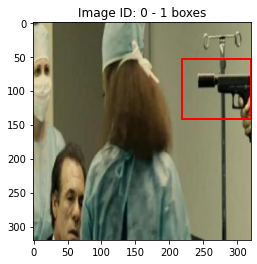

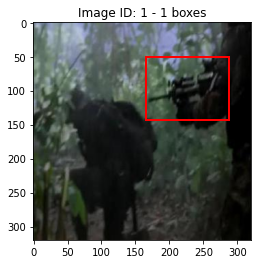

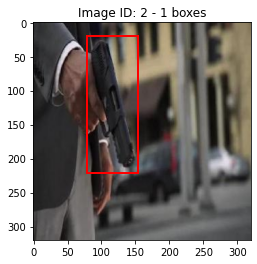

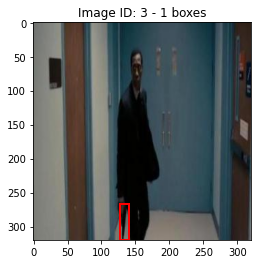

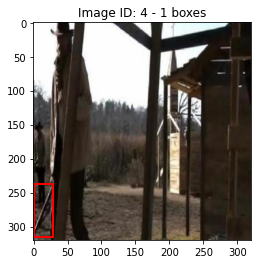

In [31]:
import json
import os
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Paths
img_dir = "/content/DETR/train2017"
ann_file = "/content/DETR/annotations/instances_train2017.json"

# Load COCO annotations
with open(ann_file, 'r') as f:
    coco = json.load(f)

# Create mapping from image_id to annotations
img_id_to_anns = {}
for ann in coco["annotations"]:
    img_id_to_anns.setdefault(ann["image_id"], []).append(ann)

# Create mapping from image_id to file name
img_id_to_file = {img["id"]: img["file_name"] for img in coco["images"]}

# Show first 5 images
for img_id in list(img_id_to_file.keys())[:5]:
    img_path = os.path.join(img_dir, img_id_to_file[img_id])
    img = Image.open(img_path).convert("RGB")

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    anns = img_id_to_anns.get(img_id, [])
    for ann in anns:
        x, y, w, h = ann["bbox"]  # COCO format: [x_min, y_min, width, height]
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    plt.title(f"Image ID: {img_id} - {len(anns)} boxes")
    plt.show()


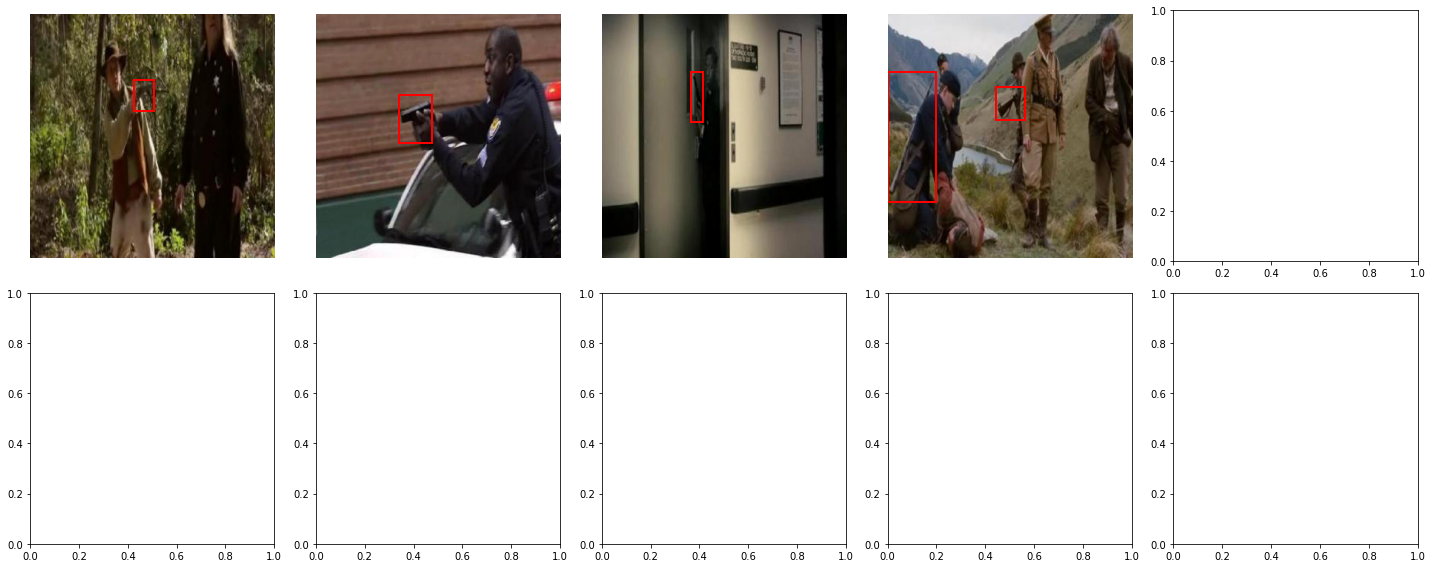

In [32]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torch

images, targets = next(iter(data_loader_train))

if hasattr(images, "tensors"):
    batch_imgs = images.tensors
else:
    batch_imgs = images

cols, rows = 5, 2
fig, axes = plt.subplots(rows, cols, figsize=(20, 8))

for idx, ax in enumerate(axes.flatten()):
    if idx >= len(batch_imgs):
        break

    # Get transformed image size
    _, h, w = batch_imgs[idx].shape

    # Denormalize
    img_tensor = batch_imgs[idx].clone()
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    img_tensor = img_tensor * std + mean
    img_tensor = img_tensor.clamp(0, 1)

    img_pil = F.to_pil_image(img_tensor)

    # Boxes are in normalized cx,cy,w,h
    boxes = targets[idx]["boxes"]
    boxes_xyxy = []
    for cx, cy, bw, bh in boxes:
        x1 = (cx - bw / 2) * w
        y1 = (cy - bh / 2) * h
        x2 = (cx + bw / 2) * w
        y2 = (cy + bh / 2) * h
        boxes_xyxy.append([x1, y1, x2, y2])

    # Plot
    ax.imshow(img_pil)
    for box in boxes_xyxy:
        x1, y1, x2, y2 = box
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                             fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [33]:
print("Boxes in sample 0:", targets[0]["boxes"])
print("Max value:", targets[0]["boxes"].max().item())
print("Min value:", targets[0]["boxes"].min().item())


Boxes in sample 0: tensor([[0.4664, 0.3336, 0.0828, 0.1297]])
Max value: 0.4664062559604645
Min value: 0.08281250298023224


In [34]:
# time its performance
import numpy as np
np.float = float  # ✅ Quick fix for legacy code
np.int = int
np.bool = bool
# ----------- Training Loop -----------
if not Direct_Detection:
  for epoch in range(args.epochs):
      print(f"\nEpoch {epoch + 1}/{args.epochs}")
      train_stats = train_one_epoch(model, criterion, data_loader_train, optimizer, device, epoch, args.clip_max_norm)
      lr_scheduler.step()

      # Evaluate
      evaluate(
          model=model,
          criterion=criterion,
          postprocessors=postprocessors,
          data_loader=data_loader_val,
          base_ds=dataset_val.coco,
          device=args.device,
          output_dir=args.output_dir
      )
      # Save checkpoint
      if(epoch %10 ==0):
          ckpt_path = os.path.join(args.output_dir, f'model_epoch_{epoch:03}.pth')
          torch.save({
              'model': model.state_dict(),
              'optimizer': optimizer.state_dict(),
              'lr_scheduler': lr_scheduler.state_dict(),
              'epoch': epoch,
          }, ckpt_path)
          print(f"Checkpoint saved: {ckpt_path}")

Output hidden; open in https://colab.research.google.com to view.

In [35]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

21:57:40


# Model Reconfiguration

In [36]:
from sklearn.metrics import classification_report

def Get_Stats(Cor_List, Com_List):
    repo = classification_report(Cor_List, Com_List, digits=3).splitlines()
    PR = []
    RE = []
    F1s = []
    print(repo[0])

    for ele in repo[2:]:
        if 'dummy' in ele:
            break
        if any(k in ele for k in ['avg', 'accuracy', 'support']):
            continue  # skip summary lines
        print(ele)
        metrics_list = ele.strip().split()
        if len(metrics_list) < 4:
            continue  # skip malformed lines
        try:
            PR.append(float(metrics_list[1]))
            RE.append(float(metrics_list[2]))
            F1s.append(float(metrics_list[3]))
        except ValueError:
            continue  # in case any conversion fails

    if not PR:  # prevent division by zero
        return 0, 0, 0, 0, 0, 0, 0, 0

    avgP = round(sum(PR) / len(PR), 3)
    avgR = round(sum(RE) / len(RE), 3)
    M5I = round(0.99 * (avgP + avgR) / 2, 3)
    M9I = round(0.7 * (avgP + avgR) / 2, 3)
    M5 = round(0.9 * (avgP + avgR) / 2, 3)
    M9 = round(0.5 * (avgP + avgR) / 2, 3)
    avgF = round(sum(F1s) / len(F1s), 3)

    correct_ctr = sum([1 for i in range(len(Cor_List)) if Cor_List[i] == Com_List[i]])
    All_ctr = len(Cor_List)
    acc = round(correct_ctr / All_ctr, 3)

    return acc, avgP, avgR, avgF, M5I, M9I, M5, M9


In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def plot_conf_matrix_with_bg(y_true, y_pred, num_classes, class_names=None, normalize=False, cmap=plt.cm.Blues):
    """
    Plots a confusion matrix with fixed size (num_classes + 1) to include background class,
    and prints a classification report with overall accuracy.
    """
    # Labels: 0..num_classes (last one is background/dummy)
    labels = list(range(num_classes + 1))

    # Auto-generate class names if not provided
    if class_names is None or len(class_names) != num_classes:
        class_names = [class_names[i] for i in range(num_classes)]
    class_names = class_names + ["dummy"]  # make sure length = num_classes + 1

    assert len(class_names) == len(labels), "class_names length must match number of labels"

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.nan_to_num(cm)  # avoid NaNs

    # Plot matrix
    fig, ax = plt.subplots(figsize=(7, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(len(labels)),
           yticks=np.arange(len(labels)),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Annotate values
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

    # Overall accuracy
    acc = accuracy_score(y_true, y_pred)
    print(f"\nOverall Accuracy: {acc:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(
        y_true, y_pred, labels=labels,
        target_names=class_names, zero_division=0
    ))


In [38]:
if Direct_Detection:
  checkpoint = torch.load(Direct_DetectionWeights, map_location=args.device)
  missing, unexpected = model.load_state_dict(checkpoint["model"], strict=True)

In [39]:
model.eval().to(args.device)

DETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_f

#Validate

In [40]:
from tqdm import tqdm

In [41]:
y_true = []
y_pred = []

In [42]:
from models.matcher import build_matcher  # or your local matcher file
matcher = build_matcher(args)  # or pass the required args manually

In [43]:
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

y_true = []
y_pred = []

total_time = 0.0
total_images = 0

model.eval()
with torch.no_grad():
    for samples, targets in tqdm(data_loader_val, desc="Evaluating"):
        start = time.time()
        samples = samples.to(args.device)
        targets = [{k: v.to(args.device) for k, v in t.items()} for t in targets]

        batch_size = samples.tensors.shape[0]  # ✅ works for NestedTensor

        # --- measure inference time ---
        if args.device == "cuda":
            torch.cuda.synchronize()
        outputs = model(samples)
        if args.device == "cuda":
            torch.cuda.synchronize()
        end = time.time()

        batch_time = batch_size * (end - start)
        avg_time_per_image = batch_time / batch_size
        print(f"Batch inference time: {batch_time:.4f}s "
              f"({avg_time_per_image:.4f}s per image)")

        total_time += batch_time
        total_images += batch_size

        # Hungarian matching
        indices = matcher(outputs, targets)

        for i, (src_idx, tgt_idx) in enumerate(indices):
            pred_logits = outputs['pred_logits'][i]
            target_labels = targets[i]['labels']

            matched_logits = pred_logits[src_idx]
            matched_preds = matched_logits.softmax(-1).argmax(-1)
            matched_tgts = target_labels[tgt_idx]

            y_pred.extend(matched_preds.cpu().numpy().tolist())
            y_true.extend(matched_tgts.cpu().numpy().tolist())

# --- Final overall average ---
overall_avg = total_time / total_images
fps = 1.0 / overall_avg
print(f"\nOverall average inference time per image: {overall_avg:.4f} seconds "
      f"({fps:.2f} FPS)")


Evaluating:   3%|▎         | 3/102 [00:00<00:15,  6.38it/s]

Batch inference time: 0.4163s (0.1041s per image)
Batch inference time: 0.1696s (0.0424s per image)
Batch inference time: 0.1760s (0.0440s per image)


Evaluating:   7%|▋         | 7/102 [00:00<00:08, 10.90it/s]

Batch inference time: 0.1875s (0.0469s per image)
Batch inference time: 0.1692s (0.0423s per image)
Batch inference time: 0.1729s (0.0432s per image)
Batch inference time: 0.1735s (0.0434s per image)


Evaluating:  11%|█         | 11/102 [00:01<00:06, 13.57it/s]

Batch inference time: 0.1921s (0.0480s per image)
Batch inference time: 0.1709s (0.0427s per image)
Batch inference time: 0.1696s (0.0424s per image)
Batch inference time: 0.1808s (0.0452s per image)


Evaluating:  15%|█▍        | 15/102 [00:01<00:05, 14.53it/s]

Batch inference time: 0.1679s (0.0420s per image)
Batch inference time: 0.1693s (0.0423s per image)
Batch inference time: 0.2017s (0.0504s per image)
Batch inference time: 0.1717s (0.0429s per image)


Evaluating:  19%|█▊        | 19/102 [00:01<00:05, 15.12it/s]

Batch inference time: 0.1695s (0.0424s per image)
Batch inference time: 0.1672s (0.0418s per image)
Batch inference time: 0.1709s (0.0427s per image)
Batch inference time: 0.1836s (0.0459s per image)


Evaluating:  23%|██▎       | 23/102 [00:01<00:05, 15.15it/s]

Batch inference time: 0.1719s (0.0430s per image)
Batch inference time: 0.1687s (0.0422s per image)
Batch inference time: 0.1696s (0.0424s per image)
Batch inference time: 0.1957s (0.0489s per image)


Evaluating:  26%|██▋       | 27/102 [00:02<00:04, 15.45it/s]

Batch inference time: 0.1698s (0.0425s per image)
Batch inference time: 0.1746s (0.0437s per image)
Batch inference time: 0.1728s (0.0432s per image)
Batch inference time: 0.1672s (0.0418s per image)


Evaluating:  28%|██▊       | 29/102 [00:02<00:04, 15.34it/s]

Batch inference time: 0.1711s (0.0428s per image)
Batch inference time: 0.1711s (0.0428s per image)
Batch inference time: 0.2092s (0.0523s per image)


Evaluating:  32%|███▏      | 33/102 [00:02<00:04, 15.40it/s]

Batch inference time: 0.1755s (0.0439s per image)
Batch inference time: 0.1682s (0.0420s per image)
Batch inference time: 0.1685s (0.0421s per image)
Batch inference time: 0.1657s (0.0414s per image)


Evaluating:  36%|███▋      | 37/102 [00:02<00:04, 15.38it/s]

Batch inference time: 0.1717s (0.0429s per image)
Batch inference time: 0.1695s (0.0424s per image)
Batch inference time: 0.1721s (0.0430s per image)
Batch inference time: 0.1700s (0.0425s per image)


Evaluating:  40%|████      | 41/102 [00:02<00:03, 15.30it/s]

Batch inference time: 0.1665s (0.0416s per image)
Batch inference time: 0.1705s (0.0426s per image)
Batch inference time: 0.1965s (0.0491s per image)
Batch inference time: 0.1686s (0.0421s per image)


Evaluating:  44%|████▍     | 45/102 [00:03<00:03, 15.57it/s]

Batch inference time: 0.1727s (0.0432s per image)
Batch inference time: 0.1678s (0.0420s per image)
Batch inference time: 0.1689s (0.0422s per image)
Batch inference time: 0.1702s (0.0426s per image)


Evaluating:  48%|████▊     | 49/102 [00:03<00:03, 15.47it/s]

Batch inference time: 0.1679s (0.0420s per image)
Batch inference time: 0.1687s (0.0422s per image)
Batch inference time: 0.1719s (0.0430s per image)
Batch inference time: 0.1688s (0.0422s per image)


Evaluating:  52%|█████▏    | 53/102 [00:03<00:03, 15.15it/s]

Batch inference time: 0.1710s (0.0428s per image)
Batch inference time: 0.1721s (0.0430s per image)
Batch inference time: 0.1687s (0.0422s per image)


Evaluating:  56%|█████▌    | 57/102 [00:04<00:02, 15.33it/s]

Batch inference time: 0.1800s (0.0450s per image)
Batch inference time: 0.1725s (0.0431s per image)
Batch inference time: 0.1817s (0.0454s per image)
Batch inference time: 0.1751s (0.0438s per image)


Evaluating:  60%|█████▉    | 61/102 [00:04<00:02, 15.13it/s]

Batch inference time: 0.1879s (0.0470s per image)
Batch inference time: 0.1739s (0.0435s per image)
Batch inference time: 0.1712s (0.0428s per image)
Batch inference time: 0.2032s (0.0508s per image)


Evaluating:  64%|██████▎   | 65/102 [00:04<00:02, 15.27it/s]

Batch inference time: 0.1998s (0.0499s per image)
Batch inference time: 0.1709s (0.0427s per image)
Batch inference time: 0.1673s (0.0418s per image)
Batch inference time: 0.1676s (0.0419s per image)


Evaluating:  68%|██████▊   | 69/102 [00:04<00:02, 15.34it/s]

Batch inference time: 0.1678s (0.0420s per image)
Batch inference time: 0.1690s (0.0422s per image)
Batch inference time: 0.1713s (0.0428s per image)
Batch inference time: 0.1667s (0.0417s per image)


Evaluating:  72%|███████▏  | 73/102 [00:05<00:01, 15.32it/s]

Batch inference time: 0.1681s (0.0420s per image)
Batch inference time: 0.2095s (0.0524s per image)
Batch inference time: 0.1706s (0.0426s per image)
Batch inference time: 0.1722s (0.0430s per image)


Evaluating:  74%|███████▎  | 75/102 [00:05<00:01, 15.21it/s]

Batch inference time: 0.1648s (0.0412s per image)
Batch inference time: 0.1932s (0.0483s per image)
Batch inference time: 0.1690s (0.0422s per image)
Batch inference time: 0.1709s (0.0427s per image)


Evaluating:  79%|███████▉  | 81/102 [00:05<00:01, 15.38it/s]

Batch inference time: 0.1713s (0.0428s per image)
Batch inference time: 0.1712s (0.0428s per image)
Batch inference time: 0.1673s (0.0418s per image)
Batch inference time: 0.1689s (0.0422s per image)


Evaluating:  81%|████████▏ | 83/102 [00:05<00:01, 15.14it/s]

Batch inference time: 0.1695s (0.0424s per image)
Batch inference time: 0.1690s (0.0423s per image)
Batch inference time: 0.1673s (0.0418s per image)
Batch inference time: 0.1687s (0.0422s per image)


Evaluating:  87%|████████▋ | 89/102 [00:06<00:00, 15.41it/s]

Batch inference time: 0.1694s (0.0424s per image)
Batch inference time: 0.1685s (0.0421s per image)
Batch inference time: 0.1703s (0.0426s per image)
Batch inference time: 0.1690s (0.0422s per image)


Evaluating:  89%|████████▉ | 91/102 [00:06<00:00, 15.18it/s]

Batch inference time: 0.1705s (0.0426s per image)
Batch inference time: 0.1722s (0.0430s per image)
Batch inference time: 0.2026s (0.0506s per image)
Batch inference time: 0.1707s (0.0427s per image)


Evaluating:  95%|█████████▌| 97/102 [00:06<00:00, 15.58it/s]

Batch inference time: 0.1810s (0.0453s per image)
Batch inference time: 0.1675s (0.0419s per image)
Batch inference time: 0.1679s (0.0420s per image)
Batch inference time: 0.1666s (0.0416s per image)


Evaluating:  99%|█████████▉| 101/102 [00:06<00:00, 15.55it/s]

Batch inference time: 0.1700s (0.0425s per image)
Batch inference time: 0.1719s (0.0430s per image)
Batch inference time: 0.1644s (0.0411s per image)
Batch inference time: 0.1680s (0.0420s per image)


Evaluating: 100%|██████████| 102/102 [00:07<00:00, 14.39it/s]

Batch inference time: 0.0598s (0.0299s per image)

Overall average inference time per image: 0.0440 seconds (22.73 FPS)


In [44]:
print(y_pred)
print(y_true)

[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

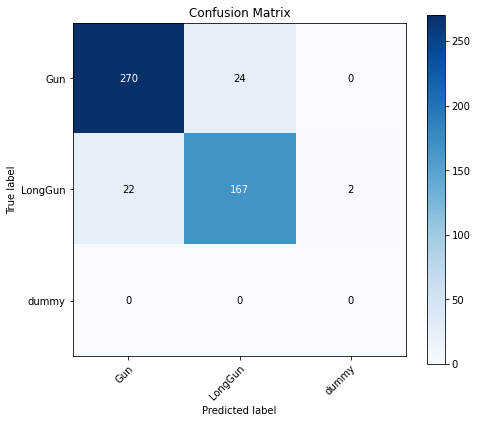


Overall Accuracy: 0.9010

Classification Report:
              precision    recall  f1-score   support

         Gun       0.92      0.92      0.92       294
     LongGun       0.87      0.87      0.87       191
       dummy       0.00      0.00      0.00         0

    accuracy                           0.90       485
   macro avg       0.60      0.60      0.60       485
weighted avg       0.90      0.90      0.90       485



In [45]:
plot_conf_matrix_with_bg(y_true, y_pred, num_of_classes, class_names=class_names, normalize=False)

##Test

In [46]:
dataset_test = build_dataset(image_set='test', args=args)
sampler_test = torch.utils.data.SequentialSampler(dataset_test)
data_loader_test = DataLoader(
    dataset_test, batch_size=args.batch_size, sampler=sampler_test,
    drop_last=False, collate_fn=utils.collate_fn, num_workers=args.num_workers
)


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [47]:
from models.matcher import build_matcher  # or your local matcher file
matcher = build_matcher(args)  # or pass the required args manually

In [48]:
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

y_true = []
y_pred = []

total_time = 0.0
total_images = 0

model.eval()
with torch.no_grad():
    for samples, targets in tqdm(data_loader_test, desc="Evaluating"):
        start = time.time()
        samples = samples.to(args.device)
        targets = [{k: v.to(args.device) for k, v in t.items()} for t in targets]

        batch_size = samples.tensors.shape[0]  # ✅ works for NestedTensor

        # --- measure inference time ---
        if args.device == "cuda":
            torch.cuda.synchronize()
        outputs = model(samples)
        if args.device == "cuda":
            torch.cuda.synchronize()
        end = time.time()

        batch_time = batch_size * (end - start)
        avg_time_per_image = batch_time / batch_size
        print(f"Batch inference time: {batch_time:.4f}s "
              f"({avg_time_per_image:.4f}s per image)")

        total_time += batch_time
        total_images += batch_size

        # Hungarian matching
        indices = matcher(outputs, targets)

        for i, (src_idx, tgt_idx) in enumerate(indices):
            pred_logits = outputs['pred_logits'][i]
            target_labels = targets[i]['labels']

            matched_logits = pred_logits[src_idx]
            matched_preds = matched_logits.softmax(-1).argmax(-1)
            matched_tgts = target_labels[tgt_idx]

            y_pred.extend(matched_preds.cpu().numpy().tolist())
            y_true.extend(matched_tgts.cpu().numpy().tolist())

# --- Final overall average ---
overall_avg = total_time / total_images
fps = 1.0 / overall_avg
print(f"\nOverall average inference time per image: {overall_avg:.4f} seconds "
      f"({fps:.2f} FPS)")


Evaluating:   6%|▌         | 3/54 [00:00<00:07,  6.62it/s]

Batch inference time: 0.2917s (0.0729s per image)
Batch inference time: 0.1728s (0.0432s per image)
Batch inference time: 0.1749s (0.0437s per image)


Evaluating:  13%|█▎        | 7/54 [00:00<00:04, 10.63it/s]

Batch inference time: 0.1877s (0.0469s per image)
Batch inference time: 0.1942s (0.0486s per image)
Batch inference time: 0.1775s (0.0444s per image)
Batch inference time: 0.1822s (0.0456s per image)


Evaluating:  20%|██        | 11/54 [00:01<00:03, 13.48it/s]

Batch inference time: 0.1722s (0.0430s per image)
Batch inference time: 0.1700s (0.0425s per image)
Batch inference time: 0.1720s (0.0430s per image)
Batch inference time: 0.1694s (0.0423s per image)


Evaluating:  28%|██▊       | 15/54 [00:01<00:02, 14.58it/s]

Batch inference time: 0.1717s (0.0429s per image)
Batch inference time: 0.1859s (0.0465s per image)
Batch inference time: 0.1682s (0.0421s per image)
Batch inference time: 0.1712s (0.0428s per image)


Evaluating:  35%|███▌      | 19/54 [00:01<00:02, 15.24it/s]

Batch inference time: 0.1692s (0.0423s per image)
Batch inference time: 0.1805s (0.0451s per image)
Batch inference time: 0.1710s (0.0428s per image)
Batch inference time: 0.1662s (0.0416s per image)


Evaluating:  43%|████▎     | 23/54 [00:01<00:02, 15.23it/s]

Batch inference time: 0.1694s (0.0423s per image)
Batch inference time: 0.1885s (0.0471s per image)
Batch inference time: 0.1727s (0.0432s per image)
Batch inference time: 0.1685s (0.0421s per image)


Evaluating:  50%|█████     | 27/54 [00:02<00:01, 15.29it/s]

Batch inference time: 0.1687s (0.0422s per image)
Batch inference time: 0.2165s (0.0541s per image)
Batch inference time: 0.1673s (0.0418s per image)
Batch inference time: 0.1723s (0.0431s per image)


Evaluating:  57%|█████▋    | 31/54 [00:02<00:01, 15.48it/s]

Batch inference time: 0.1717s (0.0429s per image)
Batch inference time: 0.1687s (0.0422s per image)
Batch inference time: 0.1725s (0.0431s per image)
Batch inference time: 0.1708s (0.0427s per image)


Evaluating:  65%|██████▍   | 35/54 [00:02<00:01, 15.43it/s]

Batch inference time: 0.1805s (0.0451s per image)
Batch inference time: 0.1724s (0.0431s per image)
Batch inference time: 0.1960s (0.0490s per image)
Batch inference time: 0.1714s (0.0429s per image)


Evaluating:  69%|██████▊   | 37/54 [00:02<00:01, 15.45it/s]

Batch inference time: 0.1697s (0.0424s per image)
Batch inference time: 0.1694s (0.0424s per image)
Batch inference time: 0.2236s (0.0559s per image)
Batch inference time: 0.1729s (0.0432s per image)


Evaluating:  76%|███████▌  | 41/54 [00:03<00:00, 15.29it/s]

Batch inference time: 0.1712s (0.0428s per image)
Batch inference time: 0.1751s (0.0438s per image)
Batch inference time: 0.1708s (0.0427s per image)
Batch inference time: 0.1678s (0.0419s per image)


Evaluating:  87%|████████▋ | 47/54 [00:03<00:00, 15.33it/s]

Batch inference time: 0.1773s (0.0443s per image)
Batch inference time: 0.1683s (0.0421s per image)
Batch inference time: 0.1739s (0.0435s per image)
Batch inference time: 0.1695s (0.0424s per image)


Evaluating:  94%|█████████▍| 51/54 [00:03<00:00, 15.50it/s]

Batch inference time: 0.1672s (0.0418s per image)
Batch inference time: 0.1670s (0.0418s per image)
Batch inference time: 0.1936s (0.0484s per image)
Batch inference time: 0.1684s (0.0421s per image)


Evaluating:  98%|█████████▊| 53/54 [00:03<00:00, 15.65it/s]

Batch inference time: 0.1669s (0.0417s per image)
Batch inference time: 0.1654s (0.0413s per image)
Batch inference time: 0.1284s (0.0428s per image)


Evaluating: 100%|██████████| 54/54 [00:03<00:00, 13.63it/s]


Overall average inference time per image: 0.0444 seconds (22.53 FPS)


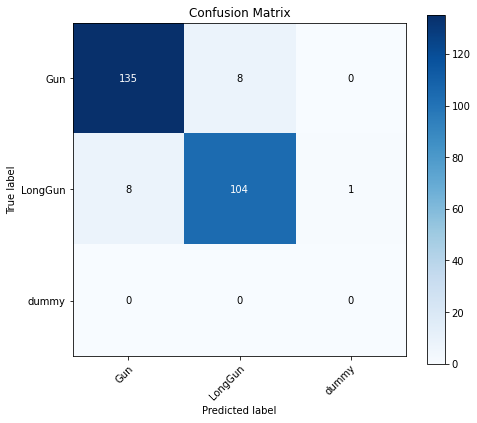


Overall Accuracy: 0.9336

Classification Report:
              precision    recall  f1-score   support

         Gun       0.94      0.94      0.94       143
     LongGun       0.93      0.92      0.92       113
       dummy       0.00      0.00      0.00         0

    accuracy                           0.93       256
   macro avg       0.62      0.62      0.62       256
weighted avg       0.94      0.93      0.94       256



In [49]:
plot_conf_matrix_with_bg(y_true, y_pred, num_of_classes, class_names=class_names, normalize=False)